## Importamos las Librerias

In [16]:
#import warnings
#warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt

from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics

## Cargar el dataset

In [17]:
df = pd.read_csv('C:/Users/mitev/Desktop/Prácticas/chocolate_sales_proyect/dataset/Chocolate Sales.csv')

In [18]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


## Modelo Prophet

In [19]:
## Cambiamos la columna Amount por una de tipo numérico
df["Amount"] = df["Amount"].replace('[\\$,]', '', regex=True).astype(float) 

In [20]:
df["Date"] = pd.to_datetime(df["Date"])

In [21]:
sales_daily = df.groupby('Date')['Amount'].sum().reset_index()
sales_daily = sales_daily.sort_values('Date')

sales_daily.rename(columns={'Date': 'ds', 'Amount': 'y'}, inplace=True)

model = Prophet()
model.fit(sales_daily)

## Es para establecer la predicción en el periodo que escribamos
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

16:16:53 - cmdstanpy - INFO - Chain [1] start processing
16:16:53 - cmdstanpy - INFO - Chain [1] done processing


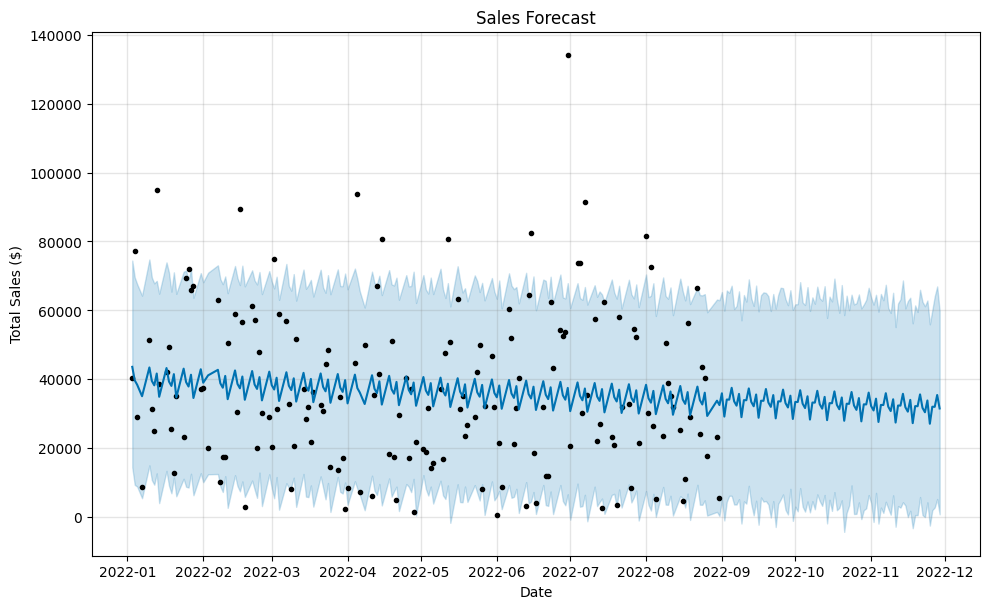

In [22]:
## Creamos una gráfica para ver los resultados de las predicciones
fig1 = model.plot(forecast)
plt.title("Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Total Sales ($)")
plt.show()

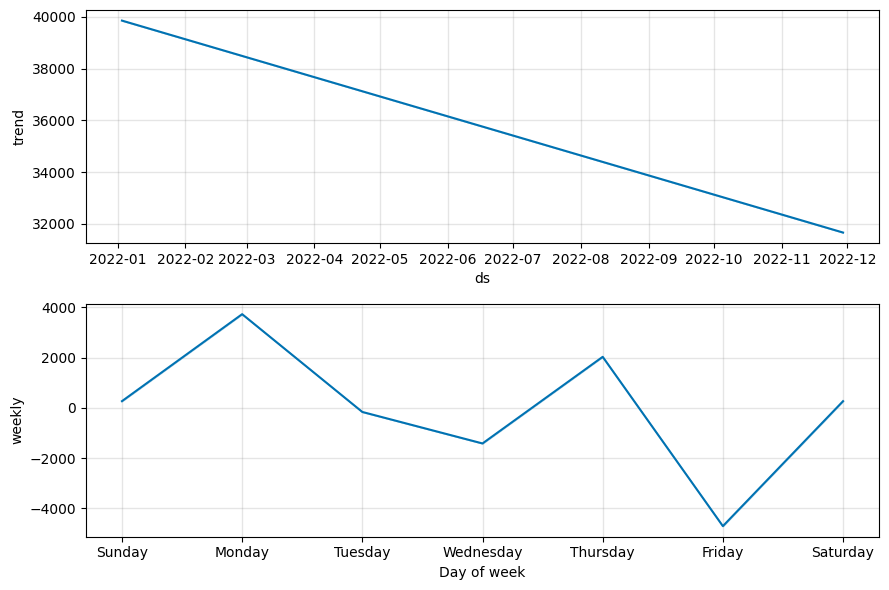

  0%|          | 0/1 [00:00<?, ?it/s]16:16:54 - cmdstanpy - INFO - Chain [1] start processing
16:16:54 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  7.45it/s]

  horizon           mse          rmse           mae      mape     mdape  \
0  2 days  6.898709e+08  26265.394483  22679.387803  0.404227  0.404227   
1  3 days  7.346343e+08  27104.137141  24643.508671  0.500416  0.500416   
2  4 days  5.201412e+08  22806.604449  21357.982961  3.008232  3.008232   
3  7 days  6.012134e+08  24519.653740  23906.206283  3.145821  3.145821   
4  8 days  2.284362e+08  15114.104827  14618.991795  0.497319  0.497319   

      smape  coverage  
0  0.464535       0.5  
1  0.530920       0.5  
2  0.935495       1.0  
3  1.014486       1.0  
4  0.400525       1.0  


In [23]:
## Creamos algunas otras gráficas adicionales para ver otras métricas de resultados
fig2 = model.plot_components(forecast)
plt.show()

df_cv = cross_validation(model, initial='180 days', period='60 days', horizon='30 days')

df_metrics = performance_metrics(df_cv)
print(df_metrics.head())